<h1 style="font-weight: bold;">SIMPLE LINEAR REGRESSION MANUAL</h1>


<p style="font-size: 20px; font-weight: 400;"><i>The Dataset in CSV format</i> is converted to <i>a Pandas Dataframe</i>.</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("simple_linear_regression_data.csv")
df.head()

,X,Y
0,0.274,15.183
1,7.211,54.433
2,7.413,44.167
3,7.688,111.329
4,8.996,116.419


<p style="font-size: 20px; font-weight: 400;"><i>The Dataframe</i> is divided into <i>Features (X)</i> and <i>Labels (Y)</i> datasets.</p>

In [2]:
x, y = df.iloc[:,:1], df.iloc[:,1]

<p style="font-size: 20px; font-weight: 400;"><i>The Features (X)</i> and <i>Labels (Y)</i> are splitted into their corresponding <i>Train</i> and <i>Test</i> sets, with <i>the Test size</i> being <i>one-fifth</i> of the whole dataset.</p>

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h2 style="font-weight: bold;">Simple Linear Regression</h2>
<p style="font-size: 20px; font-weight: 400;"><i>Simple Linear Regression</i> is a statistical method used to model the <i>linear relationship</i> between <i>single independent variable (X)</i> and <i>single dependent variable (Y)</i>. In this model, the dependent variable (Y), is forecasted based on the independent variable (X).</p>
<p style="font-size: 20px; font-weight: 400;"><i>Formula: </i></p>
<div style="text-align: left;">
    <p style="text-align: center; font-size: 20px; font-weight: 400;"">y = &beta;<sub>0</sub> + &beta;<sub>1</sub> x + &epsilon;</p>
         <p style="text-align: right; font-size: 16px;"><strong>x:</strong> Independent Variable &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
                  <p style="text-align: right; font-size: 16px;"><strong>y:</strong> Dependent Variable &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
     <p style="text-align: right; font-size: 16px;"><strong>&beta;<sub>0</sub>:</strong> Intercept Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>&beta;<sub>1</sub>:</strong> Slope Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>&epsilon;:</strong> Error Value &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

</div>

<p style="font-size: 20px; font-weight: 400;"><i>The Linear Regression Formula</i> is defined as a function with the independent variable, <i>'X'</i> and the coefficients <i>β0</i> and <i>β1</i> as inputs, and the dependent variable <i>'Y'</i> as the output.</p>

In [4]:
def y(x, Beta0, Beta1):
    return Beta0 + Beta1*x

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
  });
</script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>

<h2 style="font-weight: bold;">Residual Sum of Squares</h2>

<p style="font-size: 20px; font-weight: 400;"><i>Residual Sum of Squares</i> is the squared difference between <i>observed</i> and <i>predicted values.</i>The lower RSS, the better the regression line fits with the data points.</p>
<p style="font-size: 20px; font-weight: 400;"><i>Formula: </i></p>
<div style="text-align: left;">
    <p style="font-size: 20px; font-weight: 400;">$$\text{MSE} = \sum_{i=1}^{n} (y_i - \ p_i)^2$$</p>
    <p style="text-align: right; font-size: 16px;"><strong>n:</strong> Number of Instances (Rows)&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>y<sub>i</sub>:</strong> \(i\)th Actual Y Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>p<sub>i</sub>:</strong> \(i\)th Prediction Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

</div>

<p style="font-size: 20px; font-weight: 400;"><i>Residual Sum of Squares</i> value is calculated using the function below, with inputs being <i>actual</i> and <i>predicted y values</i>.</p

In [5]:
def Residual_Sum_of_Squares(actual_y, predicted_y):
    return sum((actual_y - predicted_y)**2)

<h2 style="font-weight: bold;">Least Squares Method</h2>

<p style="font-size: 20px; font-weight: 400;">In order to find best fitting linear regression line to data points, it is necessary to minimize the error rate by keeping Residual Sum of Squares (RSS) as low as possible. Therefore, it is required to identify the beta parameters that minimize RSS to the lowest possible value. This process of determining the optimal beta parameters is referred to as Least Squares Method. </p>

<p style="font-size: 20px; font-weight: 400;">RSS values for the training set are calculated by assigning 1000 different values, ranging from 0 to 100, to both β0 and β1.</p>

In [6]:

rss = [(Beta0, Beta1, Residual_Sum_of_Squares(y_train.values, y(x_train.iloc[:, 0].values, Beta0, Beta1))) 
       for Beta0 in np.linspace(0, 100, 1000) 
       for Beta1 in np.linspace(0, 100, 1000)]

<p style="font-size: 20px; font-weight: 400;">The RSS values for different β0 and β1 parameters are illustrated in the 3D graph below. The combination leading to the smallest RSS value among them is highlighted with a point on the graph.</p>
<p style="font-size: 20px; font-weight: 400;">The beta parameters shown are close to the optimal ones that yield the minimum RSS but are not exactly the same. Since the parameter values were selected with 0.1 differences between them, the optimal beta parameters were unintentionally missed.</p>

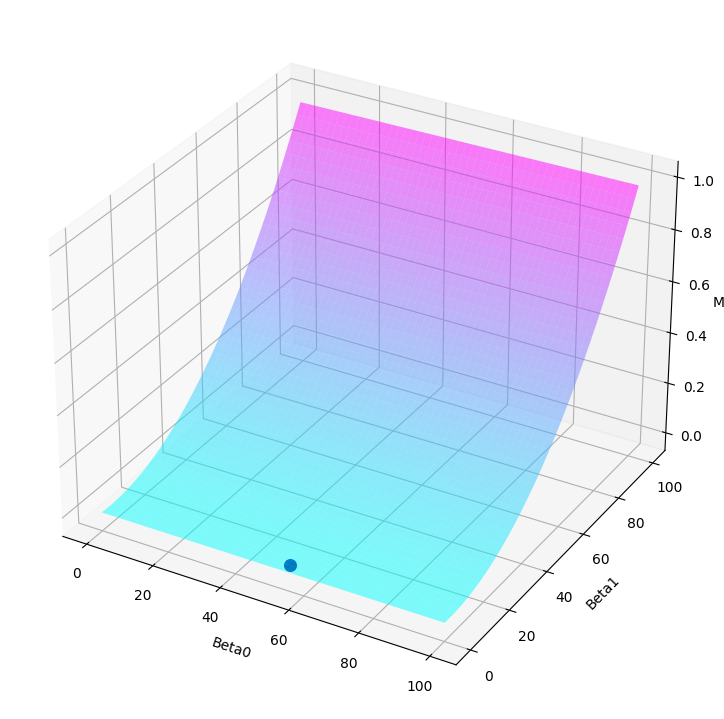

In [7]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
warnings.filterwarnings("ignore", category=UserWarning)

fig = plt.figure(figsize=(8,7)) 
ax = Axes3D(fig, auto_add_to_figure=False) 

fig.add_axes(ax)

X = np.array([i[0] for i in rss]).reshape(1000,1000)
Y = np.array([i[1] for i in rss]).reshape(1000,1000)
Z = np.array([i[2] for i in rss]).reshape(1000,1000)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='cool')

rss = sorted(rss, key=lambda x: x[2])
closeOptimalBeta0, closeOptimalBeta1, closeMinRSS = rss[0]

ax.scatter(closeOptimalBeta0, closeOptimalBeta1, closeMinRSS, s=70, color='darkblue')

ax.set_xlabel("Beta0") 
ax.set_ylabel("Beta1") 
ax.set_zlabel("MSE")  

plt.show()

<p style="font-size: 20px; font-weight: 400;">To observe more closely, the RSS values for different β0 and β1 are shown in the two separate graphs below.</p>

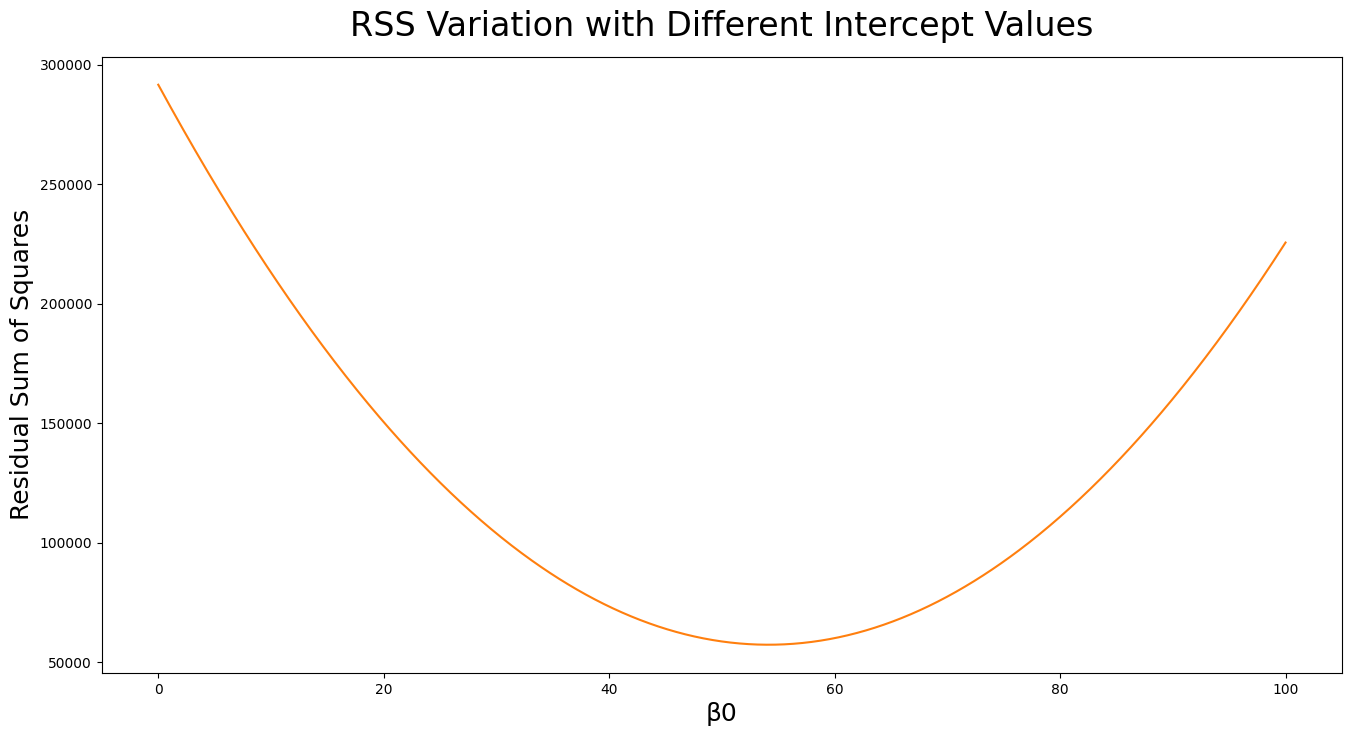

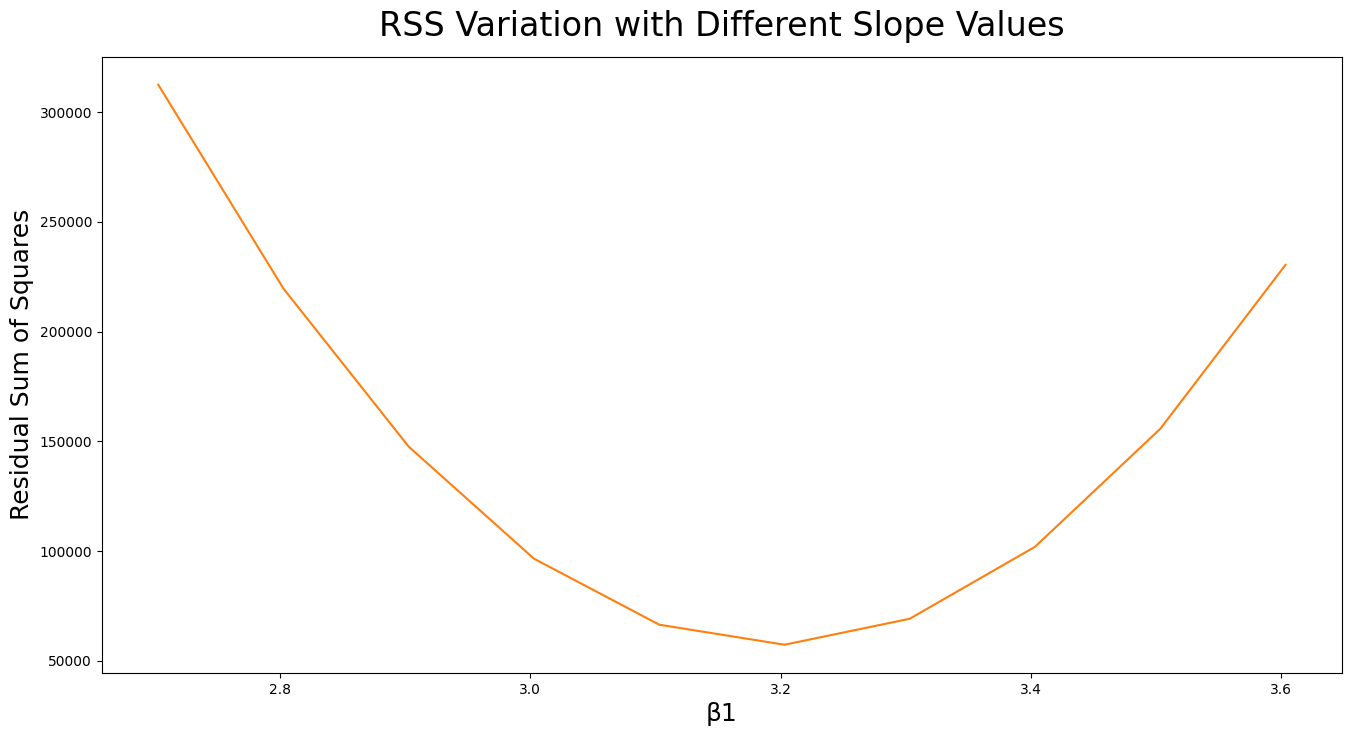

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

betas = [["β0", "Intercept", closeOptimalBeta0, 1000], 
         ["β1", "Slope", closeOptimalBeta1, 10]]

for i in range(2):
    plt.figure(figsize=[16,8])
    
    sns.lineplot(x=np.array([a[i] for a in rss if a[1-i] == betas[1-i][2]])[:betas[i][-1]],
                 y=np.array([a[2] for a in rss if a[1-i] == betas[1-i][2]])[:betas[i][-1]],
                 color=sns.color_palette()[1])
    
    plt.title(f"RSS Variation with Different {betas[i][1]} Values", fontsize=24, pad=15)
    plt.xlabel(f"{betas[i][0]}", fontsize=18)
    plt.ylabel("Residual Sum of Squares", fontsize=18)
plt.show()

<p style="font-size: 20px; font-weight: 400;">As seen in the figure, the graphs exhibit a convex structure. There exists a unique optimal value for each parameter; moving away from this value, regardless of direction, results in a gradual increase in the RSS value.</p>

<p style="font-size: 20px; font-weight: 400;">When the partial derivative of the RSS function with respect to β0 or β1 is taken and set equal to zero, the resulting values represent the optimal parameters.</p>

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
  });
</script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>
<div style="text-align: left;">
    <p style="font-size: 20px; font-weight: 400;">$$\text{RSS} = \sum_{i=1}^{n} (y_i - \ p_i)^2$$</p>
    <p style="font-size: 20px; font-weight: 400;">$$\frac{\partial}{\partial \beta_1} \text{RSS} = -2 \sum_{i=1}^{n} x_i (y_i - (\beta_0 + \beta_1 x_i)) = 0$$</p>
    <p style="font-size: 20px; font-weight: 400;">$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}$$</p>


</div>

<p style="font-size: 20px; font-weight: 400;">β1 is derived based on the formula provided above.</p>

In [9]:
Beta1 = (sum([(y_train.values[i] - y_train.mean()) * (x_train.values[i][0] - x_train.mean()) for i in range(x_train.shape[0])])/sum([(x_train.values[i][0] - x_train.mean())**2 for i in range(x_train.shape[0])]))[0]
Beta1

3.1776614242481522

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
  });
</script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>
<div style="text-align: left;">
    <p style="font-size: 20px; font-weight: 400;">$$\text{RSS} = \sum_{i=1}^{n} (y_i - \ p_i)^2$$</p>
    <p style="font-size: 20px; font-weight: 400;">$$\frac{\partial}{\partial \beta_0} \text{RSS} = -2 \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i)) = 0$$</p>
    <p style="font-size: 20px; font-weight: 400;">$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$</p>


</div>

<p style="font-size: 20px; font-weight: 400;">β0 is derived based on the formula provided above.</p>

In [10]:
Beta0 = (y_train.mean() - Beta1 * x_train.mean())[0]
Beta0

56.66299027505005

<p style="font-size: 20px; font-weight: 400;">The simple linear regression formula is constructed using the optimal beta values derived above.</p>

In [11]:
equation = f"y = { round(Beta0, 3) } + { round(Beta1, 3) } x"
print(f"The Simple Linear Regression Formula : { equation }")

The Simple Linear Regression Formula : y = 56.663 + 3.178 x


<p style="font-size: 20px; font-weight: 400;">Predictions for the test set are generated based on the linear regression formula, using the feature values from the test data.</p>

In [12]:
preds = y(x_test.values.flatten(), Beta0, Beta1)
preds

array([207.94509536, 608.75941911,  80.21899441, 423.9688743 ,
       538.92077633, 636.03328711, 154.24897261, 525.45066955,
       422.99968757, 644.08865882, 401.69029006, 635.10540998,
       548.6761969 , 130.72474509,  98.39839542, 224.59921889,
       191.37994636, 199.18746048, 245.20317556, 109.82208824])

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
  });
</script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>

<h2 style="font-weight: bold;">Mean Squared Error</h2>

<p style="font-size: 20px; font-weight: 400;"><i>The Mean Squared Error</i> is the average squared difference between <i>observed</i> and <i>predicted values.</i> MSE is frequently used for evaluating the performance of regression models.</p>
<p style="font-size: 20px; font-weight: 400;"><i>Formula: </i></p>
<div style="text-align: left;">
    <p style="font-size: 20px; font-weight: 400;">$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \ p_i)^2$$</p>
    <p style="text-align: right; font-size: 16px;"><strong>n:</strong> Number of Instances (Rows)&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>y<sub>i</sub>:</strong> \(i\)th Actual Y Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>p<sub>i</sub>:</strong> \(i\)th Prediction Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

</div>

<p style="font-size: 20px; font-weight: 400;"><i>The Mean Square Error</i> is calculated by using <i>Predictions</i> and <i>Actual Y Values.</i></p>

In [13]:
mse = sum((y_test - preds)**2) / x_test.shape[0]
print("The Mean Squared Error:", round(mse, 3))

The Mean Squared Error: 1098.394


<p style="font-size: 20px; font-weight: 400;">The chart below demonstrates <i>the Actual Y Values</i> in the Test set, <i>the Prediction Line</i> created by Linear Regression for the Test set, <i>The Equation of The Prediction Line</i>, and <i>the Error Lines</i> depicting the difference between the Actual Test Values and the Predicted Test Values.</p>

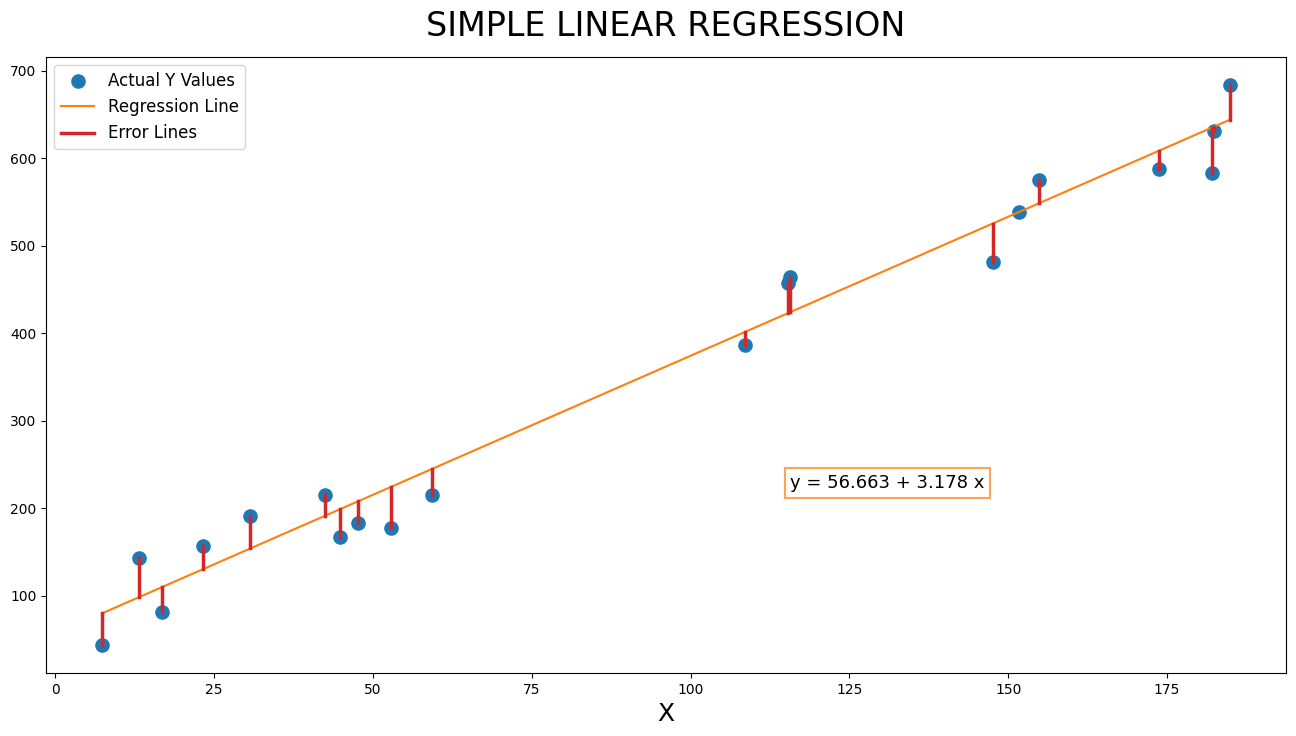

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[16,8])

#Actual Y Values (BLUE)
plt.scatter(x_test.values.reshape(-1),
            y_test,
            color=sns.color_palette()[0],
            s=90,
            label="Actual Y Values")

#Linear Regression Line (ORANGE)
sns.lineplot(x=x_test.values.reshape(-1),
             y=preds.reshape(-1),
             color=sns.color_palette()[1],
             label="Regression Line")

#Linear Regression Equation
plt.text(x=0.6,
         y=0.3, 
         s=equation, 
         fontsize=13, 
         transform=plt.gca().transAxes, 
         bbox=dict(edgecolor=sns.color_palette()[1],
                   linewidth=1.5, 
                   facecolor='white', 
                   alpha=0.7))

#Error Lines (RED)
for i in range(y_test.shape[0]):
    plt.plot([x_test.values.reshape(-1)[i]]*2,
             [y_test.values[i], preds.reshape(-1)[i]],
             color=sns.color_palette()[3],
             linewidth=2.5,
             label="Error Lines" if i == 0 else "_nolegend_")


plt.title("SIMPLE LINEAR REGRESSION", fontsize=24, pad=15)
plt.xlabel("X", fontsize=18)
plt.legend(fontsize='12')
plt.show()